In [39]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [40]:
def create_histograms_of_frame(image, frame_number):

    histogram = np.zeros(shape = (1,256,3))

    for k in range(image.shape[2]):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                h = image[i,j,k]
                histogram[0,image[i,j,k],k] += 1
                
#     plt.figure(figsize=(12, 4))
#     plt.subplot(131)  # 1 row, 3 columns, plot 1
#     plt.plot(histogram[0, :, 0], color='red')
#     plt.title('Red')

#     plt.subplot(132)  # 1 row, 3 columns, plot 2
#     plt.plot(histogram[0, :, 1], color='green')
#     plt.title('Green')

#     plt.subplot(133)  # 1 row, 3 columns, plot 3
#     plt.plot(histogram[0, :, 2], color='blue')
#     plt.title('Blue')

#     plt.tight_layout()  # Ensure that the subplots don't overlap
#     plt.savefig('histogram/frame_{}.png'.format(frame_number))
#     # Show the plots
#     plt.show()
    return histogram


In [41]:
def intersection(h_1, h_2):
    
    min_sum = np.zeros((1,3))
    max_sum = np.zeros((1,3))
    for k in range(h_1.shape[2]):
        for j in range(h_1.shape[1]):
            
            min_sum[0, k] += min(h_1[0, j, k], h_2[0, j, k])
            max_sum[0, k] += max(h_1[0, j, k], h_2[0, j, k])
            
    return np.sum(min_sum), np.sum(np.divide(min_sum, np.add(min_sum, max_sum)))
            

In [42]:
import cv2

# Open the video file
video_capture = cv2.VideoCapture('Dataset//DatasetB.avi')  # Replace with your video file path

# Check if the video file is opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

# Loop through the frames and process each one
i = 1
video_histograms = []
while True:
    ret, frame = video_capture.read()

    if not ret:
        break  # Break the loop if we've reached the end of the video

    histograms = create_histograms_of_frame(frame,i)
    video_histograms.append(histograms)
    i+=1

intersections = []  
normalised_intersections = []  

for index in range(len(video_histograms)-1):
    
    value, normalised_value = intersection(video_histograms[index],video_histograms[index + 1])
    intersections.append(value)
    normalised_intersections.append(normalised_value)

# print(intersections)

# Release the video file and close the display window
video_capture.release()
cv2.destroyAllWindows()


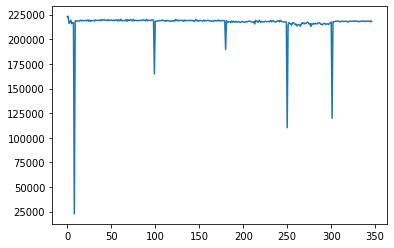

In [46]:
plt.plot(intersections)
plt.savefig('histogram_intersection/intersection.png')

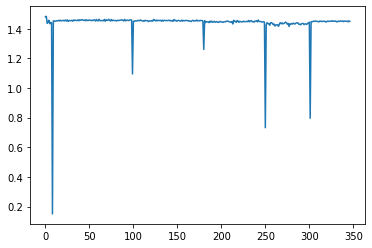

In [47]:
plt.plot(normalised_intersections)
plt.savefig('histogram_intersection/normalised_intersection.png')